# Turkiye Student Evaluation Dataset

This dataset is based on an evaluation form filled out by students for different courses. It has different attributes including attendance, difficulty, score for each evaluation question, among others. This is an unsupervised learning problem. The dataset has 5820 rows and 33 columns.

In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../../hand_made_stuff')
from handmadestuff import fit_predict_report
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/turkiye-student-evaluation_generic.csv')

In [3]:
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [7]:
df.dtypes

instr         int64
class         int64
nb.repeat     int64
attendance    int64
difficulty    int64
Q1            int64
Q2            int64
Q3            int64
Q4            int64
Q5            int64
Q6            int64
Q7            int64
Q8            int64
Q9            int64
Q10           int64
Q11           int64
Q12           int64
Q13           int64
Q14           int64
Q15           int64
Q16           int64
Q17           int64
Q18           int64
Q19           int64
Q20           int64
Q21           int64
Q22           int64
Q23           int64
Q24           int64
Q25           int64
Q26           int64
Q27           int64
Q28           int64
dtype: object

In [11]:
df.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


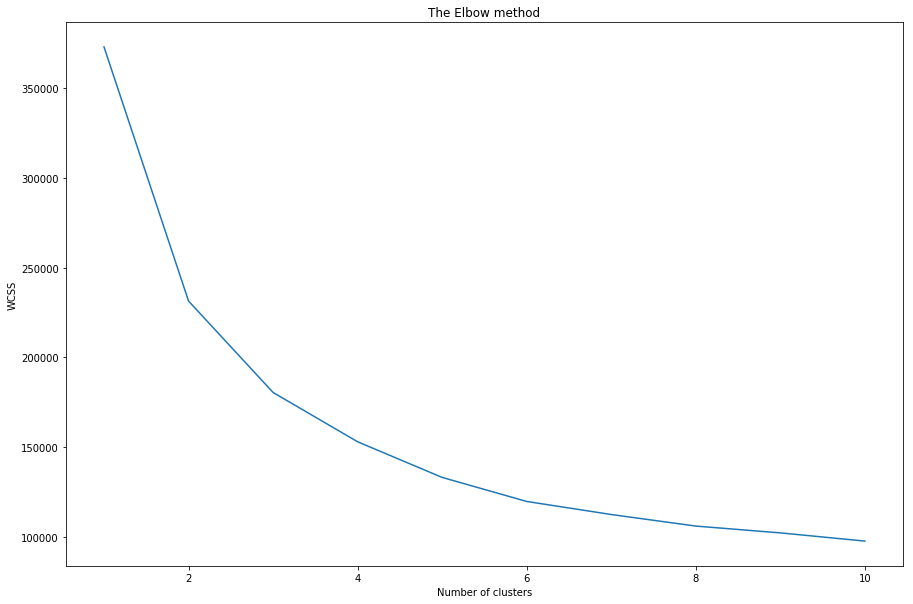

In [12]:
# using the elbow methd to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', 
                    max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15, 10))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
# Let's choose the optimal number of clusters as 3
kmeans = KMeans(n_clusters=5, init='k-means++', 
                    max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(df)

In [15]:
df['clusters'] = y_kmeans

In [22]:
df.groupby('clusters').size()

clusters
0    1257
1    1158
2    1140
3    1338
4     927
dtype: int64